# MANTENIMIENTO PREDICTIVO EN MOTORES DE AVIÓN

# LOGISTIC REGRESION

Modelo lineal que estimar probabilidades.

Simple, rápido y fácil de interpretar.

Funciona bien si existe una relación lineal entre variables y clases

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score



In [ ]:
df= pd.read_csv('../data//datos_norm_limpios.csv', delimiter=',')

df

,id,cycle,s2,s3,s4,s7,s8,s11,s12,s13,s14,s15,s17,s20,s21,RUL,label1,label2
0,1,1,0.183735,0.406802,0.309757,0.726248,0.242424,0.369048,0.633262,0.205882,0.199608,0.363986,0.333333,0.713178,0.724662,191.0,0,0
1,1,2,0.283133,0.453019,0.352633,0.628019,0.212121,0.380952,0.765458,0.279412,0.162813,0.411312,0.333333,0.666667,0.731014,190.0,0,0
2,1,3,0.343373,0.369523,0.370527,0.710145,0.272727,0.250000,0.795309,0.220588,0.171793,0.357445,0.166667,0.627907,0.621375,189.0,0,0
3,1,4,0.343373,0.256159,0.331195,0.740741,0.318182,0.166667,0.889126,0.294118,0.174889,0.166603,0.333333,0.573643,0.662386,188.0,0,0
4,1,5,0.349398,0.257467,0.404625,0.668277,0.242424,0.255952,0.746269,0.235294,0.174734,0.402078,0.416667,0.589147,0.704502,187.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,0.686747,0.587312,0.782917,0.254428,0.439394,0.726190,0.170576,0.558824,0.194344,0.656791,0.750000,0.271318,0.109500,4.0,1,2
20627,100,197,0.701807,0.729453,0.866475,0.162641,0.500000,0.708333,0.211087,0.500000,0.188668,0.727203,0.583333,0.124031,0.366197,3.0,1,2
20628,100,198,0.665663,0.684979,0.775321,0.175523,0.515152,0.738095,0.281450,0.529412,0.212148,0.922278,0.833333,0.232558,0.053991,2.0,1,2
20629,100,199,0.608434,0.746021,0.747468,0.133655,0.530303,0.916667,0.208955,0.514706,0.203065,0.823394,0.583333,0.116279,0.234466,1.0,1,2


In [92]:
class_counts = df['label2'].value_counts()
class_counts

label2
0    17531
2     1600
1     1500
Name: count, dtype: int64

Después de ver las predicciones para label2 se intentam mejorar quitando datos en los que label2=0. Se elige quitar un porcentaje de cada ID (motor) del comienzo de los datos.

Se prueba con diferentes porcentajes y se elige lo siguiente:

In [93]:
df['cumcount'] = df.groupby('id').cumcount()
df_filtered = df[df['cumcount'] >= df['cumcount'].max() * 0.2]
df_filtered = df_filtered.drop(columns='cumcount')
df_filtered

,id,cycle,s2,s3,s4,s7,s8,s11,s12,s13,s14,s15,s17,s20,s21,RUL,label1,label2
73,1,74,0.527108,0.296708,0.324612,0.673108,0.257576,0.434524,0.759062,0.132353,0.168903,0.340900,0.333333,0.511628,0.673571,118.0,0,0
74,1,75,0.225904,0.245912,0.212188,0.603865,0.257576,0.220238,0.656716,0.338235,0.155795,0.527895,0.333333,0.581395,0.632284,117.0,0,0
75,1,76,0.301205,0.396119,0.281735,0.613527,0.181818,0.351190,0.616205,0.220588,0.188358,0.287418,0.166667,0.682171,0.757526,116.0,0,0
76,1,77,0.403614,0.332679,0.316003,0.766506,0.242424,0.333333,0.620469,0.294118,0.182217,0.492882,0.416667,0.658915,0.525822,115.0,0,0
77,1,78,0.234940,0.211903,0.368839,0.582931,0.272727,0.327381,0.765458,0.411765,0.175302,0.209311,0.333333,0.573643,0.627451,114.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,0.686747,0.587312,0.782917,0.254428,0.439394,0.726190,0.170576,0.558824,0.194344,0.656791,0.750000,0.271318,0.109500,4.0,1,2
20627,100,197,0.701807,0.729453,0.866475,0.162641,0.500000,0.708333,0.211087,0.500000,0.188668,0.727203,0.583333,0.124031,0.366197,3.0,1,2
20628,100,198,0.665663,0.684979,0.775321,0.175523,0.515152,0.738095,0.281450,0.529412,0.212148,0.922278,0.833333,0.232558,0.053991,2.0,1,2
20629,100,199,0.608434,0.746021,0.747468,0.133655,0.530303,0.916667,0.208955,0.514706,0.203065,0.823394,0.583333,0.116279,0.234466,1.0,1,2


In [94]:
class_counts = df_filtered['label2'].value_counts()
class_counts

label2
0    10231
2     1600
1     1500
Name: count, dtype: int64

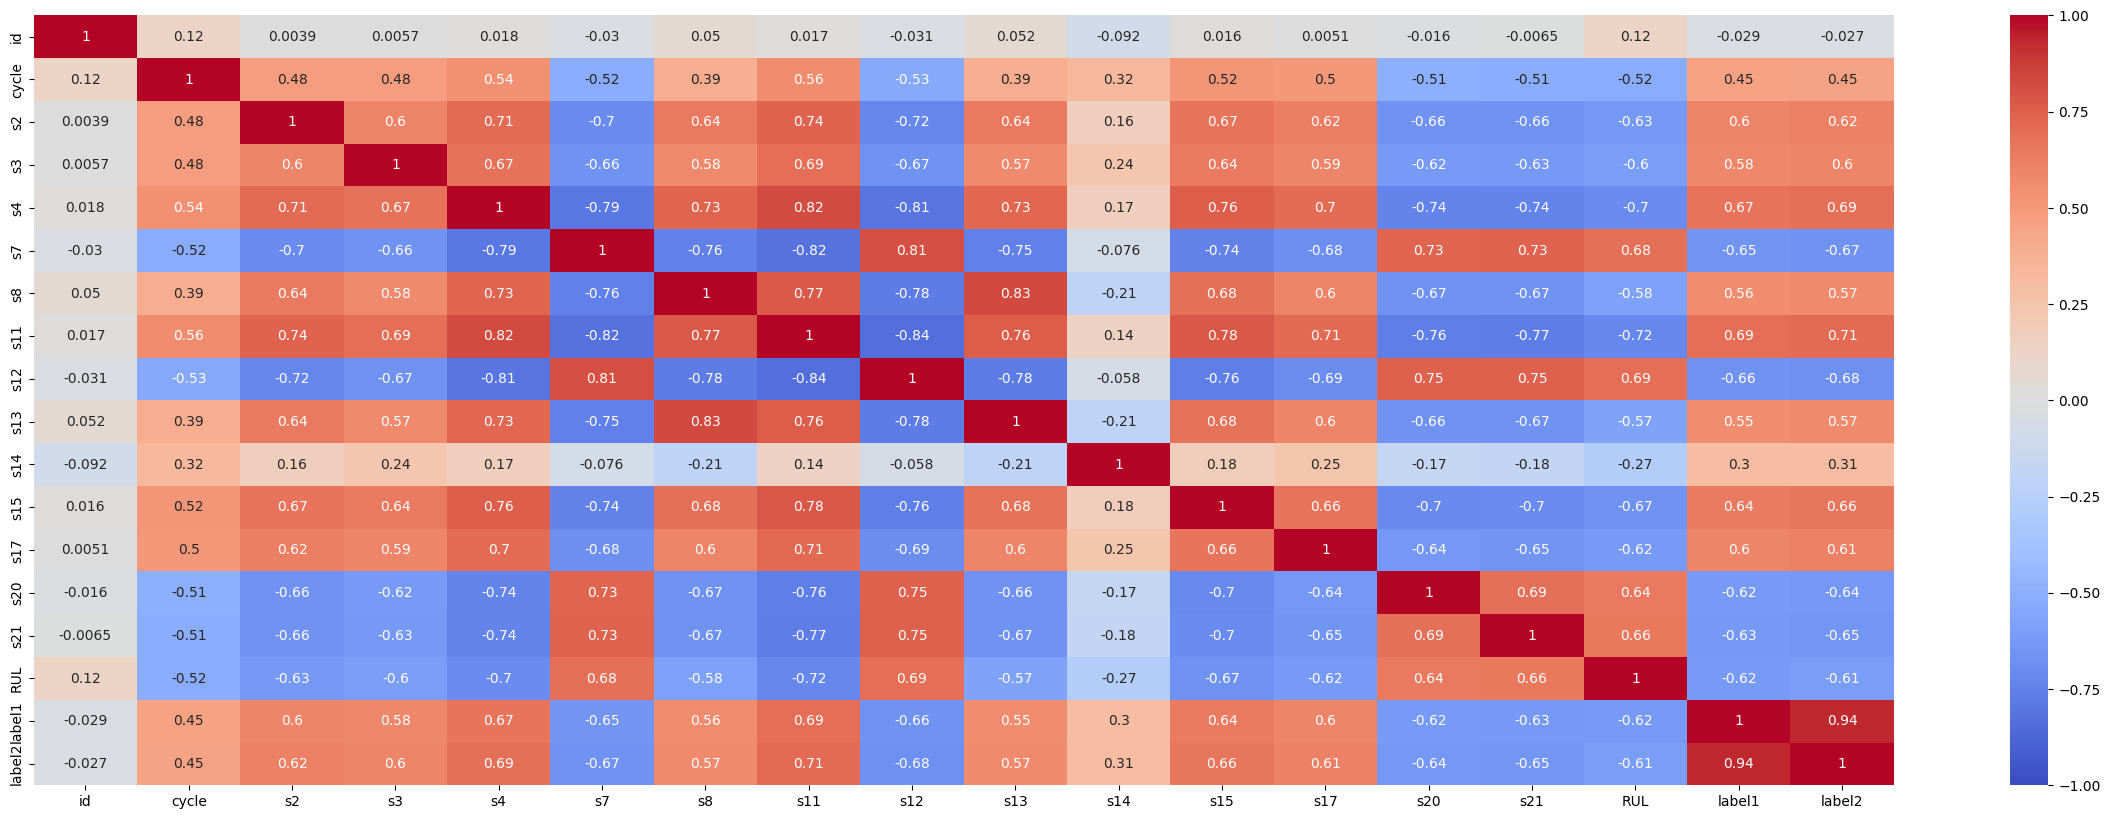

In [95]:
plt.figure(figsize=[30,10])
sns.heatmap (df_filtered.corr(numeric_only=True), annot=True, cmap='coolwarm', vmin=-1);

In [96]:
X = df_filtered.drop(columns=['id', 'cycle', 'label1', 'label2', 'RUL'])
y = df_filtered['label2']

In [97]:
X

,s2,s3,s4,s7,s8,s11,s12,s13,s14,s15,s17,s20,s21
73,0.527108,0.296708,0.324612,0.673108,0.257576,0.434524,0.759062,0.132353,0.168903,0.340900,0.333333,0.511628,0.673571
74,0.225904,0.245912,0.212188,0.603865,0.257576,0.220238,0.656716,0.338235,0.155795,0.527895,0.333333,0.581395,0.632284
75,0.301205,0.396119,0.281735,0.613527,0.181818,0.351190,0.616205,0.220588,0.188358,0.287418,0.166667,0.682171,0.757526
76,0.403614,0.332679,0.316003,0.766506,0.242424,0.333333,0.620469,0.294118,0.182217,0.492882,0.416667,0.658915,0.525822
77,0.234940,0.211903,0.368839,0.582931,0.272727,0.327381,0.765458,0.411765,0.175302,0.209311,0.333333,0.573643,0.627451
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,0.686747,0.587312,0.782917,0.254428,0.439394,0.726190,0.170576,0.558824,0.194344,0.656791,0.750000,0.271318,0.109500
20627,0.701807,0.729453,0.866475,0.162641,0.500000,0.708333,0.211087,0.500000,0.188668,0.727203,0.583333,0.124031,0.366197
20628,0.665663,0.684979,0.775321,0.175523,0.515152,0.738095,0.281450,0.529412,0.212148,0.922278,0.833333,0.232558,0.053991
20629,0.608434,0.746021,0.747468,0.133655,0.530303,0.916667,0.208955,0.514706,0.203065,0.823394,0.583333,0.116279,0.234466


In [107]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print(X_train.shape)
print(X_test.shape)

(10664, 13)
(2667, 13)


In [108]:
from sklearn.linear_model import LogisticRegression

# Crear el modelo
modelo = LogisticRegression(max_iter=500)

modelo.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [109]:
from sklearn.metrics import classification_report, confusion_matrix

# Predicciones

predictions = modelo.predict(X_test)
print(accuracy_score(y_test, predictions))

# Reporte de clasificación
print(classification_report(y_test, predictions))



0.9040119985001874
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      2039
           1       0.67      0.50      0.57       327
           2       0.85      0.87      0.86       301

    accuracy                           0.90      2667
   macro avg       0.82      0.78      0.80      2667
weighted avg       0.90      0.90      0.90      2667



In [110]:
# Matriz de confusión
cm = confusion_matrix(y_test, predictions)
print(cm)

[[1986   47    6]
 [ 125  162   40]
 [   6   32  263]]


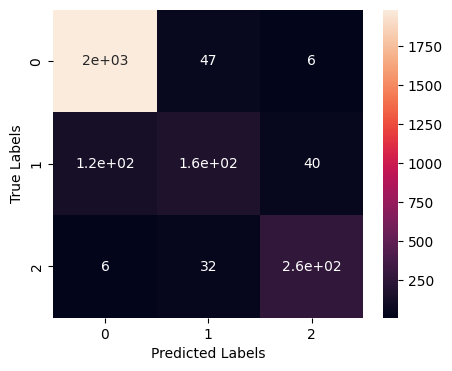

In [111]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True)
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')


plt.show()

In [112]:
import pickle

with open('../models/logistic_model_label2.pkl', 'wb') as f:
    pickle.dump({
        'model': modelo,
              
    }, f)





In [ ]:
import pandas as pd
from sklearn.model_selection import GroupShuffleSplit

# df: tu DataFrame completo
groups = df['id']import pandas as pd
from sklearn.model_selection import GroupShuffleSplit

# df: tu DataFrame completo
groups = df['id']

gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, test_idx = next(gss.split(df, groups=groups))

train = df.iloc[train_idx]
test  = df.iloc[test_idx]

X_train = train.drop(['RUL','label1','label2'], axis=1)
y_train = train[['RUL','label1','label2']]
X_test  = test.drop(['RUL','label1','label2'], axis=1)
y_test  = test[['RUL','label1','label2']]


gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, test_idx = next(gss.split(df, groups=groups))

train = df.iloc[train_idx]
test  = df.iloc[test_idx]

X_train = train.drop(['RUL','label1','label2'], axis=1)
y_train = train[['RUL','label1','label2']]
X_test  = test.drop(['RUL','label1','label2'], axis=1)
y_test  = test[['RUL','label1','label2']]
